<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Lasso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/analytics-vidhya/understanding-regression-models-c9ac4f2184dc

https://machinelearningmastery.com/lasso-regression-with-python/


Ideasl when there are more features than observations

Lassso uses L1 penalty which shringks some variables down to zero wehre they drop out.

# Libraries

In [21]:

# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

# Data

In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)

In [3]:
# summarize shape
print(dataframe.shape)

(506, 14)


In [4]:
# summarize first few lines
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
#df2 = df.set_axis(['V', 'W', 'X', 'Y', 'Z'], axis=1, inplace=False)
dataframe.set_axis(['CRIM', 'ZN', 'INDUS',  'CHAS', 'NOX', 'RM','AGE','DIS', 'RAD', 'TAX', 'PTRATIO',  'B', 'LSTAT', 'MEDV'],axis=1,inplace=True)

In [6]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The ALPH is the coefficient shrinking penalty .  Defailt value os the max of 1.

# Creating Lasso Regression

In [7]:
#Splitting the dataset
#X_train, X_test, y_train, y_test =  train_test_split(dataframe[['crim','zn','indus','chas', 'nox','rm','age','dis','rad','tax','ptratio','black','lstat']], dataframe['medv'], test_size=0.3, random_state=109)

In [8]:
#X= data_robust_scaled_named.loc[: ,data.columns != 'diagnosis']
X = dataframe.loc[: , dataframe.columns  != 'MEDV']

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [10]:
y = dataframe['MEDV']

In [11]:
X_train, X_test,y_train,y_test = train_test_split(X , y , test_size= 0.1)

In [12]:
lassoreg = Lasso()

In [13]:
lassoreg.fit(X_train, y_train)

Lasso()

In [14]:
print("Accuracy score for training data", lassoreg.score(X_train,y_train))

Accuracy score for training data 0.6839758119426793


In [15]:
print("Accuracy score for test Data", lassoreg.score(X_test,y_test))

Accuracy score for test Data 0.6485543656601487


# New Version : Applying Crss Validation to Get Predictions to Plot

In [22]:
lr = linear_model.LinearRegression()

In [23]:
y = dataframe['MEDV']

In [24]:
X_train, X_test,y_train,y_test = train_test_split(X , y , test_size= 0.1)

In [25]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, dataframe, y, cv=10)

In [ ]:
predicted

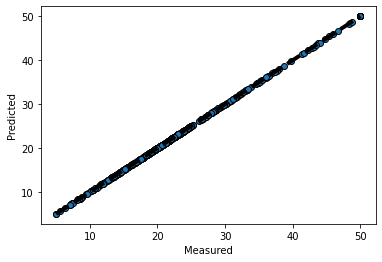

In [27]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Line Graphs

In [19]:
#fig = px.line(df, x="Age", y="lifeExp", title='Life expectancy in Canada')
#fig.show()

fig = px.line(dataframe, x="AGE", y="MEDV", title='OH MY GOD!')
fig.show()